In [25]:
from MLDA.imports.DA_modules import *

# 0. Loading Data, First Look and Choose Categorical/Numerical columns

In [26]:
# read the data
data_input = pd.read_excel('/home/jesper/Work/MLDA_app/MLDA/input_data/ENB2012_data.xlsx')
# data_input = pd.read_csv('')
# train.head(40)

# column names
for column in data_input.columns:
    print(column)
    
# If no 'column names' or 'wrong names' in data_input, changes these

X1
X2
X3
X4
X5
X6
X7
X8
Y1
Y2


## 0.1 Choosing the relevant variables

In [27]:
data_input.head() # Columns to choose from
choose_var = [0,1,2,3,4,5,6,7,8,9] # First column: 0
data = data_input.iloc[:, choose_var]
data.head(25)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


## 0.2 Separating data in cat/num classes and x/y classes, and a combination of these

In [28]:
# Pick column numbers from data, NOT from data_input, first column is 0 (zero)
categoric_x = []
numeric_x = [0,1,2,3,4,5,6,7]
categoric_y = []
numeric_y = [8,9]

################ Calc below ###############
input_classes = {} # init a dict
x = categoric_x + numeric_x
y = categoric_y + numeric_y
categoric = categoric_x + categoric_y
numeric = numeric_x + numeric_y

# Adding to the dict
input_classes['cx'] = categoric_x
input_classes['nx'] = numeric_x
input_classes['x'] = x
input_classes['cy'] = categoric_y
input_classes['ny'] = numeric_y
input_classes['y'] = y
input_classes['c'] = categoric
input_classes['n'] = numeric
categoric

[]

### 0.2.1 Convert the categorical data dtype to 'category' 

In [29]:
for entry in categoric:
    data.iloc[:, entry] = data.iloc[:, entry].astype("category")

In [30]:
# Checking that the data are of the correct dtype
# data['Item_Fat_Content'].dtype.name

### 0.2.2 Creating new names based on the variable's entity - i.e is it x, y and is it categorical or numerical

In [31]:
# Store the original column names and order
col_orig = data.columns

# Creating new names based on x, y and categoric, numeric
col_xc = ['xc'+str(num+1) for num, item in enumerate(input_classes['cx'])] # the item part is not used
col_xn = ['xn'+str(num+1) for num, item in enumerate(input_classes['nx'])] 
col_yc = ['yc'+str(num+1) for num, item in enumerate(input_classes['cy'])] 
col_yn = ['yn'+str(num+1) for num, item in enumerate(input_classes['ny'])] 
col_xy = col_xc + col_xn + col_yc + col_yn

print('col_orig:' ,col_orig)
print('x+y:', x+y)
print('col_xy:' ,col_xy)

# Transferring the right (original) ordering of the variables to the new names (x, y)
order_orig =[]

for order, item in enumerate(x+y):
    print(order, item)

# The Approach for the loop below:
# for each item in our new-name-list (col_xy) we find the original place/order of that item
# by looping through each number in the 'x+y'-list. The number in the 'x+y'-list is the 
# original order of the items in the new-name-list (col_xy). By picking that number - for example
# say 0, which say is in the 5'th place, we know by looking in col_xy at 5'th place that this item
# was original the first one. We then append this item as the first one to the list: order_orig.
# Then we pick number two, which is 1, etc

# we loop through each number from 0 to total number of columns, len(x+y)
for num in range(len(x+y)):
    # So we find 0 first...
    for order, item in enumerate(x+y):
        # pick 0 in list: x+y: let's say it is in the 5th place
        if item == num:
            # then in col_xy in the 5th place we know that this item was orig the first one 
            order_orig.append(col_xy[order])

# we restore the original order by replacing col_xy with order_orig
col_xy = order_orig

data

col_orig: Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')
x+y: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
col_xy: ['xn1', 'xn2', 'xn3', 'xn4', 'xn5', 'xn6', 'xn7', 'xn8', 'yn1', 'yn2']
0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


# 1. Data Munging

## 1.1 Getting an Overview
__Conclusion based on cell below:__ <br>
1) write... <br>
2) write... <br>

In [32]:
# Check the percentage of missing values (NaN values) for each parameter
data.isnull().sum()/len(data)*100
# Conclusion: Item_weight and Outlet_size has missing values: 17% and 28 %, respevtively

data.describe()
data.info()

for column in data.columns:
    data[column].value_counts()

X1    0.0
X2    0.0
X3    0.0
X4    0.0
X5    0.0
X6    0.0
X7    0.0
X8    0.0
Y1    0.0
Y2    0.0
dtype: float64

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


0.90    64
0.79    64
0.71    64
0.66    64
0.98    64
0.64    64
0.86    64
0.76    64
0.74    64
0.82    64
0.62    64
0.69    64
Name: X1, dtype: int64

563.5    64
735.0    64
686.0    64
637.0    64
808.5    64
514.5    64
759.5    64
710.5    64
661.5    64
612.5    64
784.0    64
588.0    64
Name: X2, dtype: int64

318.5    192
294.0    192
343.0    128
367.5     64
245.0     64
269.5     64
416.5     64
Name: X3, dtype: int64

220.50    384
147.00    192
122.50    128
110.25     64
Name: X4, dtype: int64

3.5    384
7.0    384
Name: X5, dtype: int64

5    192
4    192
3    192
2    192
Name: X6, dtype: int64

0.40    240
0.10    240
0.25    240
0.00     48
Name: X7, dtype: int64

5    144
4    144
3    144
2    144
1    144
0     48
Name: X8, dtype: int64

15.16    6
13.00    5
12.93    4
32.31    4
14.60    4
        ..
16.94    1
10.78    1
14.21    1
7.18     1
19.50    1
Name: Y1, Length: 587, dtype: int64

21.33    4
17.20    4
29.79    4
14.28    4
14.27    4
        ..
36.93    1
36.12    1
32.88    1
20.82    1
16.75    1
Name: Y2, Length: 636, dtype: int64

## 1.2 Munging the relevant columns

Here we munge the 2 columns: Item_Fat_Content and Item_Visibility

In [33]:
# data.isnull().sum()/len(data)*100

# # Item_Visibility: we make the zeroes to NaN
# data.loc[:, 'Item_Visibility'].mean()
# data.loc[:, 'Item_Visibility'] = data.loc[:, 'Item_Visibility'].replace(0.000000, np.nan)
# mean_item_vis = data.loc[:, 'Item_Visibility'].mean() # Now mean value has changed
# data.loc[:, 'Item_Visibility'].mean()

# # Item_Fat_content: we make the LF to Low Fat etc, so that we only have Low Fat and Regular
# data.loc[:'Item_Fat_Content'] = data.loc[:'Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat':'Low Fat', 'reg': 'Regular'})

# # And we drop the folowing columns
# # train.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year','Outlet_Location_Type'], axis=1, inplace=True)
# data.isnull().sum()/len(data)*100


# # Results
# data.head(40)
# data.info()

# for column in data.columns:
#     data[column].value_counts()

## 1.3 Ordinal data --> numeric data

If we have any ordinal data in our categorical group we have to transform it into numbers, and move it to the numerical group.

__Ordinal data:__ Outlet_Size <br>
__Nominal data:__ Item_Fat_Content, Item_Type, Outlet_Location_Type, Outlet_Type

In [34]:
# # Ordinal data - Outlet_Size, ref.PML p.113
# data['Outlet_Size']

# size_mapping = {
#                 'Small': 1,
#                 'Medium': 2,
#                 'High': 3
# }

# data['Outlet_Size'] = data.loc[:, ('Outlet_Size')].map(size_mapping)
# data['Outlet_Size']

<br>
<hr>

# 2. Visualizing data / Exploratory Data Analysis (EDA) 

## 2.1 Start by Naming variables - original column names or x1, x2.., y1, y2.? Choose

Now before we display all our data we have the option to choose between 2 different namings of our variables. I.e. the long original name, or xc, xn, for categorial or numerical features, respectively.

In [35]:
name_as_x = 'no' # Set this to 'yes' or 'no'

if name_as_x == 'yes':
    data.columns = col_xy
else:
    data.columns = col_orig
# data
col_xy
col_orig

['xn1', 'xn2', 'xn3', 'xn4', 'xn5', 'xn6', 'xn7', 'xn8', 'yn1', 'yn2']

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

## 2.2 Short naming - we make the option to pick a short name for some of the variables

In [36]:
df_xc = data.iloc[:, input_classes['cx']]
df_xn = data.iloc[:, input_classes['nx']]
df_yn = data.iloc[:, input_classes['ny']]
df_c = data.iloc[:, input_classes['c']]
df_n = data.iloc[:, input_classes['n']]
df_x = data.iloc[:, input_classes['x']]
df_y = data.iloc[:, input_classes['y']]

## 2.3 Generic Plots - plots which are generated automaticly

### 2.3.1 Visualising Numerical Variables

In [37]:
sns.set(style='whitegrid', palette="deep", font_scale=.9, rc={"figure.figsize": [8, 5]})

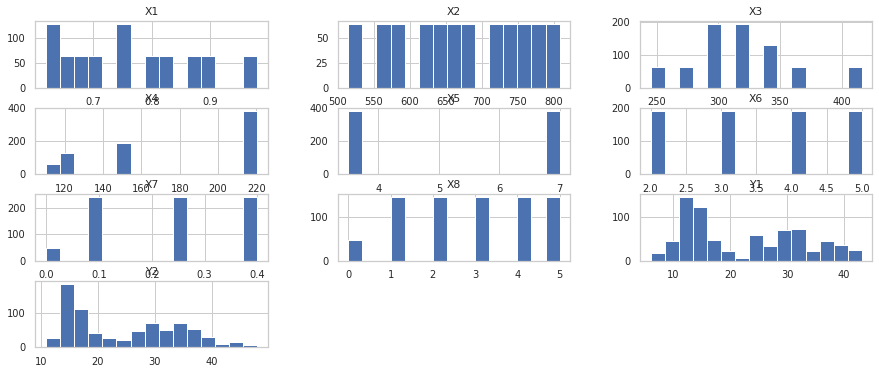

In [38]:
fig_num_rows = math.ceil(len(df_n.columns)/3)

df_n.hist(bins=15, figsize=(15, 6), layout=(fig_num_rows, 3));

### 2.3.2 Visualising Categorical Variables

In [39]:
fig_num_rows = math.ceil(len(df_xc.columns)/3)

fig, ax = plt.subplots(fig_num_rows, 3, figsize=(20, 8))
for var, subplot in zip(df_c.columns, ax.flatten()):
    sns.countplot(df_c[var], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.show();

<Figure size 1440x576 with 0 Axes>

### 2.3.3 Visualising Relationships Between Numerical Variables

In [40]:
# sns.pairplot(data)
def make_plot():
    for var in df_c.columns[:len(df_c.columns)]:
        sns.pairplot(data, hue=var)
    plt.show()
make_plot()

# Understanding the plot above:
# the plot above for one single var:
# sns.pairplot(data, hue='Outlet_Type')
# so we iterate through all the categorical columns names and use each of the categories as hue's

### 2.3.4 Visualising Relationships Between Numerical and Categorical Variables 

In [41]:
# data.iloc[:, input_classes['y']].columns
# data.iloc[:,input_classes['cx']].columns
data.iloc[:,input_classes['c']].columns
df_c.columns

Index([], dtype='object')

Index([], dtype='object')

In [42]:
# We make boxplot of each of the categorial input variables and the numeric output variables
# Categorial classes ordered by increasing outlet price

# Number of rows
def plotXc_vs_Yn():
    fig_num_rows = math.ceil(len(df_xc.columns)/3)*len(df_yn.columns)

    fig, ax = plt.subplots(fig_num_rows, 3, figsize=(15, 10))
    for output_var in df_yn.columns:
        for var, subplot in zip(df_xc.columns, ax.flatten()):
            sorted_ = data.groupby([var])[output_var].median().sort_values()
            sns.boxplot(x=var, y=output_var, data=data, ax=subplot, order=list(sorted_.index))
            #sns.despine(trim=True, offset=2)
            for label in subplot.get_xticklabels():
                label.set_rotation(90)
    plt.tight_layout()
    plt.show()
plotXc_vs_Yn()

<Figure size 1080x720 with 0 Axes>

## 2.4 Non-generic plots - plots where you have to choose variable parameters

In [43]:
# # conditional relationships
# col_orig
# col_xy

# def plotChooseVars():
#     cond_plot = sns.FacetGrid(data=data, col='Item_Type', hue='Outlet_Size', col_wrap=4)
#     cond_plot.map(sns.scatterplot, 'Item_MRP', 'Item_Outlet_Sales');
#     plt.legend(loc='upper right')
#     plt.show()
# plotChooseVars()

<br>
<hr>

# 3. Statistics

In [44]:
x # features
y # dependent var
data.iloc[:, x] # we see we have text values in our categorical data
df_x.iloc[2]

[0, 1, 2, 3, 4, 5, 6, 7]

[8, 9]

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


X1      0.98
X2    514.50
X3    294.00
X4    110.25
X5      7.00
X6      4.00
X7      0.00
X8      0.00
Name: 2, dtype: float64

In [45]:
# check our data for unique values etc

# Check the percentage of missing values for each parameter
data.isnull().sum()/len(data)*100 # we have 3 columns with missing values 

# Based on the shown data we have 3 columns with some NaN values

data.describe()
data.info()

for column in data.columns:
    data[column].value_counts()

X1    0.0
X2    0.0
X3    0.0
X4    0.0
X5    0.0
X6    0.0
X7    0.0
X8    0.0
Y1    0.0
Y2    0.0
dtype: float64

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


0.90    64
0.79    64
0.71    64
0.66    64
0.98    64
0.64    64
0.86    64
0.76    64
0.74    64
0.82    64
0.62    64
0.69    64
Name: X1, dtype: int64

563.5    64
735.0    64
686.0    64
637.0    64
808.5    64
514.5    64
759.5    64
710.5    64
661.5    64
612.5    64
784.0    64
588.0    64
Name: X2, dtype: int64

318.5    192
294.0    192
343.0    128
367.5     64
245.0     64
269.5     64
416.5     64
Name: X3, dtype: int64

220.50    384
147.00    192
122.50    128
110.25     64
Name: X4, dtype: int64

3.5    384
7.0    384
Name: X5, dtype: int64

5    192
4    192
3    192
2    192
Name: X6, dtype: int64

0.40    240
0.10    240
0.25    240
0.00     48
Name: X7, dtype: int64

5    144
4    144
3    144
2    144
1    144
0     48
Name: X8, dtype: int64

15.16    6
13.00    5
12.93    4
32.31    4
14.60    4
        ..
16.94    1
10.78    1
14.21    1
7.18     1
19.50    1
Name: Y1, Length: 587, dtype: int64

21.33    4
17.20    4
29.79    4
14.28    4
14.27    4
        ..
36.93    1
36.12    1
32.88    1
20.82    1
16.75    1
Name: Y2, Length: 636, dtype: int64

## 3.1 Heatmapping correlation and p-values

### 3.1.1 First we call the correlation function from corr_stats

In [53]:
from MLDA.corr_stats.corr_heatmap import correlation
c = df_c.columns.to_list() # categorical
n = df_n.columns.to_list() # numerical
corr = correlation(data, catcols=c, numcols=n, CI=.1, method_cc='Asym', method_nn='Spearmann')
corr[0] # correlation values
corr[1] # p values

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,0,-1,-0.255805,-0.870886,0.869048,p > CI,p > CI,p > CI,0.622135,0.651019
X2,-1,0,0.255805,0.870886,-0.869048,p > CI,p > CI,p > CI,-0.622135,-0.651019
X3,-0.255805,0.255805,0,-0.193457,0.220763,p > CI,p > CI,p > CI,0.471458,0.415991
X4,-0.870886,0.870886,-0.193457,0,-0.937043,p > CI,p > CI,p > CI,-0.804027,-0.803175
X5,0.869048,-0.869048,0.220763,-0.937043,0,p > CI,p > CI,p > CI,0.861283,0.864876
X6,p > CI,p > CI,p > CI,p > CI,p > CI,0,p > CI,p > CI,p > CI,p > CI
X7,p > CI,p > CI,p > CI,p > CI,p > CI,p > CI,0,0.187592,0.32286,0.288904
X8,p > CI,p > CI,p > CI,p > CI,p > CI,p > CI,0.187592,0,0.0683435,p > CI
Y1,0.622135,-0.622135,0.471458,-0.804027,0.861283,p > CI,0.32286,0.0683435,0,0.972689
Y2,0.651019,-0.651019,0.415991,-0.803175,0.864876,p > CI,0.288904,p > CI,0.972689,0


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1,0,6.12691e-13,1.64518e-238,2.53989e-236,1,1,1,1.77123e-83,8.65499e-94
X2,0,1,6.12691e-13,1.64518e-238,2.53989e-236,1,1,1,1.77123e-83,8.65499e-94
X3,6.12691e-13,6.12691e-13,1,6.5307e-08,6.23118e-10,1,1,1,9.35923e-44,1.70934e-33
X4,1.64518e-238,1.64518e-238,6.5307e-08,1,0,1,1,1,4.03971e-175,1.77879e-174
X5,2.53989e-236,2.53989e-236,6.23118e-10,0,1,1,1,1,1.98903e-227,1.78609e-231
X6,1,1,1,1,1,1,1,1,0.908185,0.626154
X7,1,1,1,1,1,1,1,1.634e-07,4.32088e-20,3.13234e-16
X8,1,1,1,1,1,1,1.634e-07,1,0.0583421,0.198232
Y1,1.77123e-83,1.77123e-83,9.35923e-44,4.03971e-175,1.98903e-227,0.908185,4.32088e-20,0.0583421,1,0
Y2,8.65499e-94,8.65499e-94,1.70934e-33,1.77879e-174,1.78609e-231,0.626154,3.13234e-16,0.198232,0,1


### 3.1.2 Heatmapping the correlation values

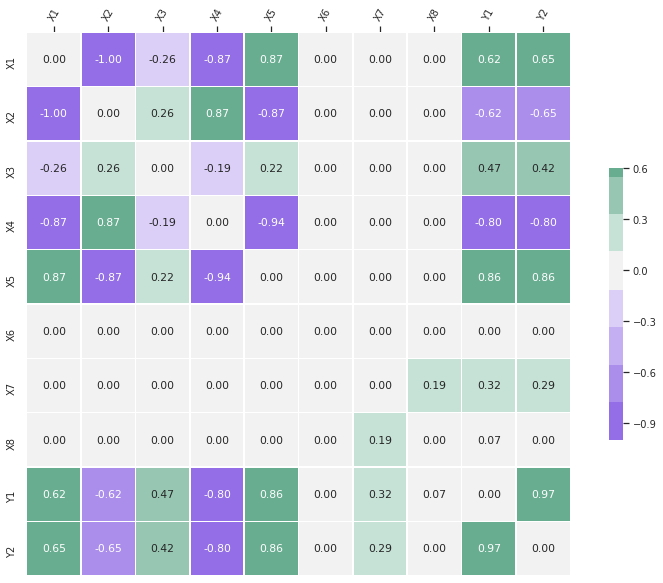

In [54]:
correlation = corr[0].loc[:, :].replace('p > CI', 0)
correlation = correlation.loc[:, :].fillna(0)

cmap = sns.diverging_palette(275, 150,s=80, l=55, n=9)
g = sns.heatmap(correlation, vmax=.6, center=0, square=True,
               linewidths=.5, cbar_kws={'shrink': .5}, annot=True,
               fmt='.2f', cmap=cmap)
# sns.despine()
g.figure.set_size_inches(14, 10)

# Due to bug in matplotlib 3.1.1
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)

# place xticks at the top
g.xaxis.set_ticks_position('top')
# rotate the top text
g.set_xticklabels(g.get_yticklabels(), rotation = 60);
plt.show();

### 3.1.3 Heatmapping the p values

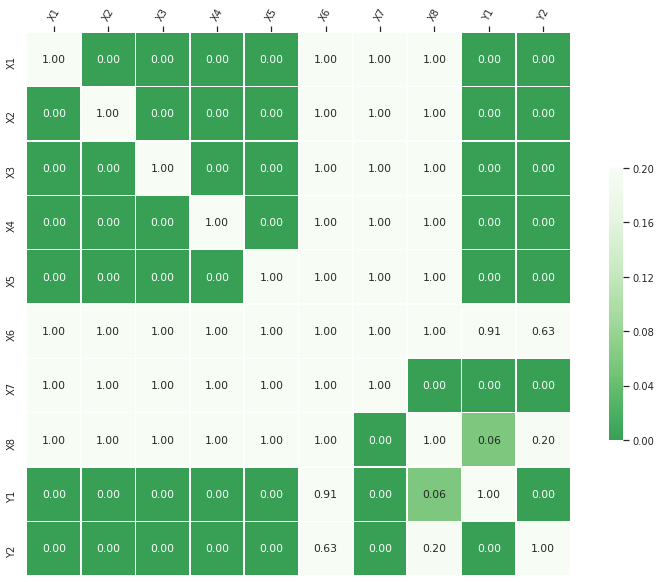

In [55]:
correlation = corr[1].loc[:, :].fillna(1)

g = sns.heatmap(correlation, vmax=.2, center=0.05, square=True,
               linewidths=.5, cbar_kws={'shrink': .5}, annot=True,
               fmt='.2f', cmap='Greens_r')
# sns.despine()
g.figure.set_size_inches(14, 10)

# Due to bug in matplotlib 3.1.1
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)

# place xticks at the top
g.xaxis.set_ticks_position('top')
# rotate the top text
g.set_xticklabels(g.get_yticklabels(), rotation = 60);
plt.show();

# Training our Model